In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

We have a dataset which gives the important details about a doctor. Our aim is to build a model to predict the doctor's consulatation fees.

In [2]:
#creating two dataframes for testing and training from the csv files
ds_test=pd.read_csv('Final_Test.csv')
ds_train=pd.read_csv('Final_Train.csv')

In [3]:
#lets view the training dataset
ds_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
#lets check the columns
ds_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

### Column Description:-
1. Qualification: Qualification and degrees held by the doctor
2. Experience: Experience of the doctor in number of years
3. Rating: Rating given by patients
4. Place: Area and the city where the doctor is located.
5. Profile: Type of the doctor
6. Miscellaeous_Info: Extra information about the doctor
7. Fees: Fees charged by the doctor


In [5]:
#lets check the datatypes of columns
print(ds_train.dtypes)              #training dataset
print('\n')
print(ds_test.dtypes)               #testing dataset 

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object


Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object


In [6]:
#lets check for null values
print(ds_train.isnull().sum())            # training dataset
print('\n')
print(ds_test.isnull().sum())             # testing dataset

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


In [7]:
#checking the unique values of missing columns
#Rating
print(ds_train['Rating'].value_counts())
print('\n')
#Place
print(ds_train['Place'].value_counts())
print('\n')
#Miscellaneous_Info
print(ds_train['Miscellaneous_Info'].value_counts())

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
76%       9
71%       9
73%       8
75%       8
60%       7
74%       7
78%       6
56%       5
68%       5
69%       4
70%       4
72%       3
57%       3
55%       2
33%       2
63%       2
64%       2
62%       2
53%       1
47%       1
7%        1
45%       1
48%       1
36%       1
65%       1
40%       1
58%       1
Name: Rating, dtype: int64


HSR Layout, Bangalore             75
Andheri West, Mumbai              70
Dwarka, Delhi                     67
Banjara Hills, Hyderabad          64
Mulund West, Mumbai               54
                                  ..
Kapashera, Delhi                   1
Hebbal Kempapura, Bangalore        1
Siddapura, Bangalore               1
Gandhi Nagar, Chennai     

In [8]:
#filling missing values
#Rating 
ds_train['Rating'].fillna('0%',inplace=True)
ds_test['Rating'].fillna('0%',inplace=True)
#Place
ds_train['Place'].fillna('Others,Others',inplace=True)
ds_test['Place'].fillna('Others,Others',inplace=True)
#Miscellaneous_Info
ds_train['Miscellaneous_Info'].fillna('Others,Others',inplace=True)
ds_test['Miscellaneous_Info'].fillna('Others,Others',inplace=True)

In [9]:
#lets again check for missing values
print(ds_train.isnull().sum())            # training dataset
print('\n')
print(ds_test.isnull().sum())             # testing dataset

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64


Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64


In [10]:
#converting experience into integers
#training dataset
ds_train['Experience']=ds_train['Experience'].str.split()
ds_train['Experience']=ds_train['Experience'].str[0].astype('int')
#testing dataset
ds_test['Experience']=ds_test['Experience'].str.split()
ds_test['Experience']=ds_test['Experience'].str[0].astype('int')

In [11]:
#checking the dataset
ds_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0%,"Mathikere - BEL, Bangalore",ENT Specialist,"Others,Others",300
3,"BSc - Zoology, BAMS",12,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0%,"Nungambakkam, Chennai",General Medicine,"Others,Others",100
5958,MBBS,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [12]:
#Extracting cities
#training dataset
ds_train['Place'] = ds_train['Place'].str.split(",")
ds_train['City'] = ds_train['Place'].str[-1]
ds_train['Place'] = ds_train['Place'].str[0]
#testing dataset
ds_test['Place'] = ds_test['Place'].str.split(",")
ds_test['City'] = ds_test['Place'].str[-1]
ds_test['Place'] = ds_test['Place'].str[0]

In [13]:
#lets check the unique values of qualification
print(ds_train['Qualification'].unique())          #training dataset
print('\n')
print(ds_test['Qualification'].unique())           #testing dataset


['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']


['MBBS' 'MBBS, Diploma in Otorhinolaryngology (DLO)' 'MBBS, DDVL' 'BAMS'
 'BDS, MDS - Conservative Dentistry & Endodontics' 'BDS, MDS'
 'BDS, MDS - Pedodontics'
 'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA'
 'BHMS' 'BDS' 'MBBS, FCD - Diabetology' 'MBBS, DDV'
 'MBBS, MD - Dermatology' 'MS - ENT'
 'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)'
 'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology'
 'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)'
 'BDS, MDS - Periodontics' 'BDS, MDS- Oral Path

In [14]:
#let us find the maximum and minimum number of qualifications of a dotctor in the training and testing datase
# Train set
dat_train = ds_train.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the Train dataset is {}\n".format(dat_train.max()))
print("And the qualifications is --> {}\n\n".format(ds_train.Qualification[dat_train.idxmax()]))
print("Minimum qualification of a doctor in the Train dataset is {}\n".format(dat_train.min()))
print("And the qualifications is --> {}\n\n".format(ds_train.Qualification[dat_train.idxmin()]))

# Test set
dat_test = ds_test.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the Test dataset is {}\n".format(dat_test.max()))
print("And the qualifications is --> {}\n\n".format(ds_test.Qualification[dat_test.idxmax()]))
print("Minimum qualification of a doctor in the Test dataset is {}\n".format(dat_test.min()))
print("And the qualifications is --> {}".format(ds_test.Qualification[dat_test.idxmin()]))

Maximum qualifications of a doctor in the Train dataset is 10

And the qualifications is --> Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


Minimum qualification of a doctor in the Train dataset is 1

And the qualifications is --> BAMS


Maximum qualifications of a doctor in the Test dataset is 17

And the qualifications is --> BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in 

In [15]:
#Training dataset
#Since our training dataset contains the max number of qualifications as 10,we split them into parts 
ds_train['Qual_1'] = ds_train['Qualification'].str.split(',').str[0]
ds_train['Qual_2'] = ds_train['Qualification'].str.split(',').str[1]
ds_train['Qual_3'] = ds_train['Qualification'].str.split(',').str[2]
ds_train['Qual_4'] = ds_train['Qualification'].str.split(',').str[3]
ds_train['Qual_5'] = ds_train['Qualification'].str.split(',').str[4]
ds_train['Qual_6'] = ds_train['Qualification'].str.split(',').str[5]
ds_train['Qual_7'] = ds_train['Qualification'].str.split(',').str[6]
ds_train['Qual_8'] = ds_train['Qualification'].str.split(',').str[7]
ds_train['Qual_9'] = ds_train['Qualification'].str.split(',').str[8]
ds_train['Qual_10'] = ds_train['Qualification'].str.split(',').str[9]

#while handling this missing values will occur and we replace them with NIL
ds_train['Qual_1'].fillna("NIL",inplace = True)
ds_train['Qual_2'].fillna("NIL",inplace = True)
ds_train['Qual_3'].fillna("NIL",inplace = True)
ds_train['Qual_4'].fillna("NIL",inplace = True)
ds_train['Qual_5'].fillna("NIL",inplace = True)
ds_train['Qual_6'].fillna("NIL",inplace = True)
ds_train['Qual_7'].fillna("NIL",inplace = True)
ds_train['Qual_8'].fillna("NIL",inplace = True)
ds_train['Qual_9'].fillna("NIL",inplace = True)
ds_train['Qual_10'].fillna("NIL",inplace = True)

In [16]:
ds_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,BHMS,MD - Homeopathy,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,BAMS,MD - Ayurveda Medicine,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
2,"MBBS, MS - Otorhinolaryngology",9,0%,Mathikere - BEL,ENT Specialist,"Others,Others",300,Bangalore,MBBS,MS - Otorhinolaryngology,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
3,"BSc - Zoology, BAMS",12,0%,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,BSc - Zoology,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,MBBS,MS - ENT,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
5957,MBBS,33,0%,Nungambakkam,General Medicine,"Others,Others",100,Chennai,MBBS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
5958,MBBS,41,97%,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,MBBS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
5959,"MBBS, MD - General Medicine",15,90%,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,MBBS,MD - General Medicine,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL


1. for i in range(0,5961):
2. if ds_train.Qualification[i]==ds_train.Qualification[dat_train.idxmax()]:
3. ds_train[i]
        
For this code i got key error in the index 2035.       

In [17]:
#let me check the qualification status of 2035 th index
ds_train['Qualification'].iloc[2035]

'Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology'

In [18]:
#let us find whether our splitting is done as expected
ds_train.iloc[2035:2040,:]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,97%,Ashok Nagar,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,Chennai,Fellowship in Oral implantlogy,Certified Advance Course In Endodontics,Certified in Orthodontics,Certification in Full Mouth Rehabilitation,Certified BPS Dentist,Certificate in Cosmetic Dentistry,Professional Implantology Training Course (PITC),Fellowship in Advanced Endoscopic Sinus Surgery,Degree in Dental Implant,Fellowship in Lasers & Cosmetology
2036,BAMS,10,100%,Malleswaram,Ayurveda,"100% 10 Feedback Malleswaram, Bangalore",100,Bangalore,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
2037,BAMS,7,0%,JP Nagar 1 Phase,Ayurveda,Pizhichil Sirodhara Vasthi,300,Bangalore,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
2038,"BDS, MDS",22,97%,Rajouri Garden,Dentist,"97% 19 Feedback Rajouri Garden, Delhi",200,Delhi,BDS,MDS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
2039,BHMS,27,0%,Mehdipatnam,Homeopath,Wrinkle Treatment Allergy Treatment Viral Feve...,300,Hyderabad,BHMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL


In [19]:
#For testing dataset we have to do the same steps
#Since our testing dataset contains the max number of qualifications as 17,we split them into parts 
ds_test['Qual_1'] = ds_test['Qualification'].str.split(',').str[0]
ds_test['Qual_2'] = ds_test['Qualification'].str.split(',').str[1]
ds_test['Qual_3'] = ds_test['Qualification'].str.split(',').str[2]
ds_test['Qual_4'] = ds_test['Qualification'].str.split(',').str[3]
ds_test['Qual_5'] = ds_test['Qualification'].str.split(',').str[4]
ds_test['Qual_6'] = ds_test['Qualification'].str.split(',').str[5]
ds_test['Qual_7'] = ds_test['Qualification'].str.split(',').str[6]
ds_test['Qual_8'] = ds_test['Qualification'].str.split(',').str[7]
ds_test['Qual_9'] = ds_test['Qualification'].str.split(',').str[8]
ds_test['Qual_10'] = ds_test['Qualification'].str.split(',').str[9]
ds_test['Qual_11'] = ds_test['Qualification'].str.split(',').str[10]
ds_test['Qual_12'] = ds_test['Qualification'].str.split(',').str[11]
ds_test['Qual_13'] = ds_test['Qualification'].str.split(',').str[12]
ds_test['Qual_14'] = ds_test['Qualification'].str.split(',').str[13]
ds_test['Qual_15'] = ds_test['Qualification'].str.split(',').str[14]
ds_test['Qual_16'] = ds_test['Qualification'].str.split(',').str[15]
ds_test['Qual_17'] = ds_test['Qualification'].str.split(',').str[16]


#while handling this missing values will occur and we replace them with NIL
ds_test['Qual_1'].fillna("NIL",inplace = True)
ds_test['Qual_2'].fillna("NIL",inplace = True)
ds_test['Qual_3'].fillna("NIL",inplace = True)
ds_test['Qual_4'].fillna("NIL",inplace = True)
ds_test['Qual_5'].fillna("NIL",inplace = True)
ds_test['Qual_6'].fillna("NIL",inplace = True)
ds_test['Qual_7'].fillna("NIL",inplace = True)
ds_test['Qual_8'].fillna("NIL",inplace = True)
ds_test['Qual_9'].fillna("NIL",inplace = True)
ds_test['Qual_10'].fillna("NIL",inplace = True)
ds_test['Qual_11'].fillna("NIL",inplace = True)
ds_test['Qual_12'].fillna("NIL",inplace = True)
ds_test['Qual_13'].fillna("NIL",inplace = True)
ds_test['Qual_14'].fillna("NIL",inplace = True)
ds_test['Qual_15'].fillna("NIL",inplace = True)
ds_test['Qual_16'].fillna("NIL",inplace = True)
ds_test['Qual_17'].fillna("NIL",inplace = True)

ds_test


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Qual_1,Qual_2,Qual_3,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,MBBS,35,0%,Ghatkopar East,General Medicine,"Others,Others",Mumbai,MBBS,NIL,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0%,West Marredpally,ENT Specialist,"Others,Others",Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
2,"MBBS, DDVL",40,70%,KK Nagar,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,MBBS,DDVL,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
3,BAMS,0,0%,New Ashok Nagar,Ayurveda,"Others,Others",Delhi,BAMS,NIL,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Kanakpura Road,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0%,Basavanagudi,Ayurveda,"Others,Others",Bangalore,BAMS,Doctor of Medicine,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0%,Choolai,Dermatologists,"Others,Others",Chennai,MD - Dermatology,Venereology & Leprosy,MBBS,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0%,Porur,General Medicine,"Others,Others",Chennai,MBBS,MD / MS - Obstetrics & Gynaecology,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1985,BDS,12,98%,Arekere,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Bangalore,BDS,NIL,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL


In [20]:
ds_test.iloc[1285:1295,:]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Qual_1,Qual_2,Qual_3,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
1285,"BHMS, Certificate in Child Health (CCH)",11,0%,Kapra,Homeopath,"Others,Others",Hyderabad,BHMS,Certificate in Child Health (CCH),NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1286,"BAMS, Diploma in Emergency Medicine",9,0%,Yousufguda,Ayurveda,"Others,Others",Hyderabad,BAMS,Diploma in Emergency Medicine,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1287,"BDS, PG Diploma in Conservative, Endodontics a...",4,100%,New Ashok Nagar,Dentist,Dental Crowns Dental Fillings Dental Implant F...,Delhi,BDS,PG Diploma in Conservative,Endodontics and Aesthetic Dentistry,...,Fellow of Academy of General Education (FAGE),Advanced Retreatment Course in RCT,Advanced Endotontic Course On Root Canal,Certified Course in Oral Surgery,MIDA,Certification in Prosthodontics & Periodontology,Certified Advanced Course in Wisdom Tooth Ext...,Certificate in Cosmetic Dentistry,Fellowship in Aesthetic Dentistry (FAD),Post Graduate Certificate in Endodontics (PGCE)
1288,"FAMS - Fellowship of the Academy Medicine, MBB...",28,60%,AS Rao Nagar,ENT Specialist,"60% 1 Feedback AS Rao Nagar, Hyderabad",Hyderabad,FAMS - Fellowship of the Academy Medicine,MBBS,MS - ENT,...,Cochlear Implant Surgery,Advance Course on Diagnosis of Allergy and Im...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1289,BAMS,7,0%,Andheri East,Ayurveda,"Others,Others",Mumbai,BAMS,NIL,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1290,BAMS,25,92%,Ramamurthy Nagar,Ayurveda,"92% 12 Feedback Ramamurthy Nagar, Bangalore",Bangalore,BAMS,NIL,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1291,"BDS, MDS - Conservative Dentistry & Endodontic...",21,0%,Mugalivakkam,Dentist,"Mugalivakkam, Chennai ₹300 Visits Today",Chennai,BDS,MDS - Conservative Dentistry & Endodontics,MD - Dental Laser,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1292,BHMS,4,0%,Shahdara,Homeopath,"Others,Others",Delhi,BHMS,NIL,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1293,"BHMS, MD - Homeopathy, MS - Counselling and Ps...",27,0%,Goregaon West,Homeopath,"Others,Others",Mumbai,BHMS,MD - Homeopathy,MS - Counselling and Psychotherapy,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL
1294,"BAMS, Fellowship in Medical Cosmetology",15,60%,Dwarka,Ayurveda,"60% 1 Feedback Dwarka, Delhi",Delhi,BAMS,Fellowship in Medical Cosmetology,NIL,...,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL


In [21]:
#lets create a new column for the count of qualifications in both training and testing dataset
ds_train['Qual_count'] = ds_train.Qualification.apply(lambda x: len(x.split(',')))
ds_test['Qual_count'] = ds_test.Qualification.apply(lambda x: len(x.split(',')))


In [22]:
#lets convert rating column into integer type
ds_train['Rating'] = ds_train['Rating'].str.slice(stop=-1).astype(int)         #training dataset
ds_test['Rating'] = ds_test['Rating'].str.slice(stop=-1).astype(int)           #testing dataset

In [23]:
#lets check the training dataset
ds_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count
0,"BHMS, MD - Homeopathy",24,100,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,BHMS,MD - Homeopathy,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
1,"BAMS, MD - Ayurveda Medicine",12,98,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,BAMS,MD - Ayurveda Medicine,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
2,"MBBS, MS - Otorhinolaryngology",9,0,Mathikere - BEL,ENT Specialist,"Others,Others",300,Bangalore,MBBS,MS - Otorhinolaryngology,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
3,"BSc - Zoology, BAMS",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,BSc - Zoology,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
4,BAMS,20,100,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,MBBS,MS - ENT,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
5957,MBBS,33,0,Nungambakkam,General Medicine,"Others,Others",100,Chennai,MBBS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
5958,MBBS,41,97,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,MBBS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
5959,"MBBS, MD - General Medicine",15,90,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,MBBS,MD - General Medicine,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2


In [24]:
#we can drop the Qualification and Miscellaneous_Info columns
ds_train.drop(columns=['Qualification','Miscellaneous_Info'],axis=1,inplace=True)         #training dataset
ds_test.drop(columns=['Qualification','Miscellaneous_Info'],axis=1,inplace=True)          #testing dataset

In [25]:
ds_train

,Experience,Rating,Place,Profile,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count
0,24,100,Kakkanad,Homeopath,100,Ernakulam,BHMS,MD - Homeopathy,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
1,12,98,Whitefield,Ayurveda,350,Bangalore,BAMS,MD - Ayurveda Medicine,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
2,9,0,Mathikere - BEL,ENT Specialist,300,Bangalore,MBBS,MS - Otorhinolaryngology,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
3,12,0,Bannerghatta Road,Ayurveda,250,Bangalore,BSc - Zoology,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
4,20,100,Keelkattalai,Ayurveda,250,Chennai,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,Basavanagudi,ENT Specialist,300,Bangalore,MBBS,MS - ENT,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
5957,33,0,Nungambakkam,General Medicine,100,Chennai,MBBS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
5958,41,97,Greater Kailash Part 2,General Medicine,600,Delhi,MBBS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
5959,15,90,Vileparle West,General Medicine,100,Mumbai,MBBS,MD - General Medicine,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2


In [26]:
#lets see the value of unique cities 
print(ds_train['City'].value_counts())                 #training dataset
print(ds_test['City'].value_counts())                 #testing dataset

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Others                   25
e                         1
Name: City, dtype: int64
 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Others                   6
Name: City, dtype: int64


There is a city name e in the training dataset, which may be mistyped.lets replace it by others.

In [27]:
ds_train['City'].replace('e','Others',inplace=True)

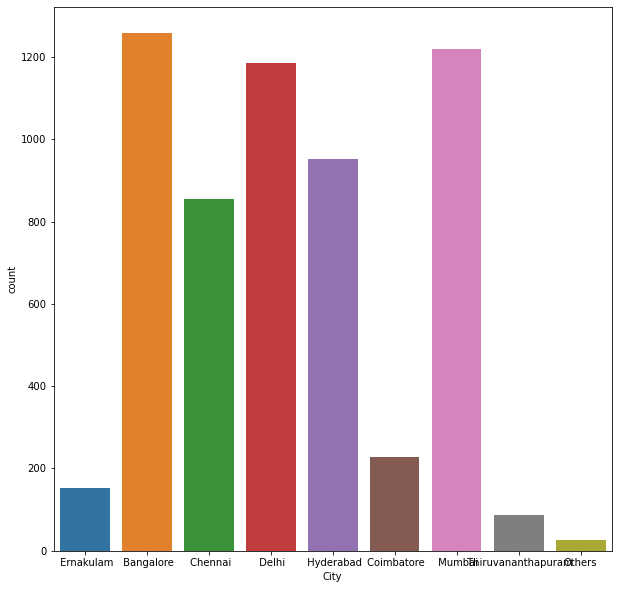

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Others                   26
Name: City, dtype: int64

In [28]:
#lets see the counts of cities in the training dataset
plt.figure(figsize=(10,10))
sns.countplot(x='City',data=ds_train)
plt.show()
ds_train['City'].value_counts()

Most of the datas recorded are by the doctors of Bangalore.

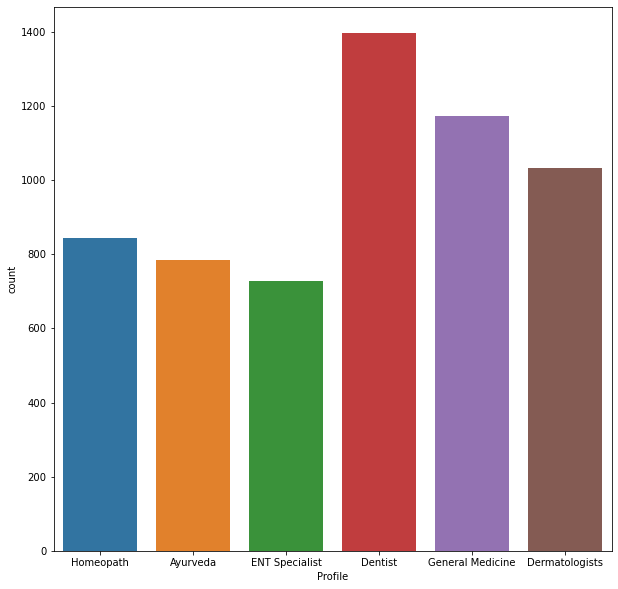

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64




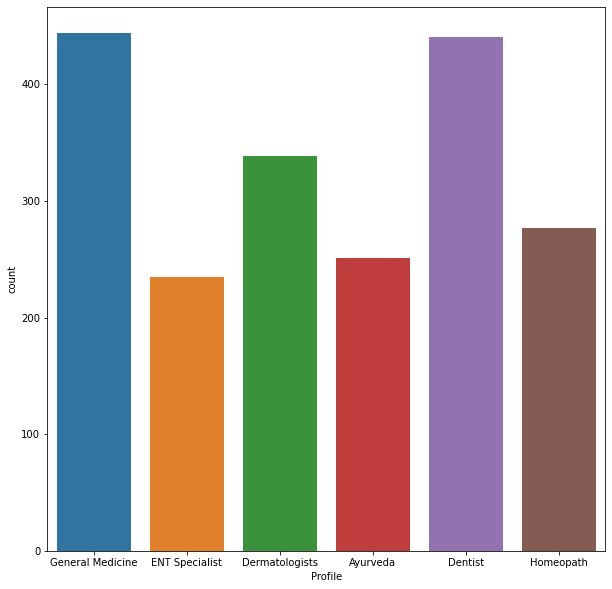

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


In [29]:
#lets see the profiles of doctors in training and testing datatset
plt.figure(figsize=(10,10))
sns.countplot(x='Profile',data=ds_train)
plt.show()
print(ds_train['Profile'].value_counts())                     #training dataset
print('\n')
plt.figure(figsize=(10,10))
sns.countplot(x='Profile',data=ds_test)
plt.show()
print(ds_test['Profile'].value_counts())                     #testing dataset

In training dataset,highest count is for profile Dentist and in testing dataset, highest count is for profile Generala Medicine.

In [30]:
#lets find the maximum fee charged by a doctor
print('Maximum fee charged by a doctor is : ',ds_train['Fees'].max())
#lets find the minimum fee charged by a doctor
print('Minimum fee charged by a doctor is : ',ds_train['Fees'].min())

Maximum fee charged by a doctor is :  950
Minimum fee charged by a doctor is :  5


In [31]:
#lets find the details of the doctor charging the max fee
ds_train[ds_train['Fees']==950]

,Experience,Rating,Place,Profile,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count
293,29,100,Adyar,General Medicine,950,Chennai,MBBS,MD - Internal Medicine,FRCP,NIL,NIL,NIL,NIL,NIL,NIL,NIL,3


The highest fee is charged by a General Medicine Doctor residing in Chennai city

In [32]:
#lets find the details of the doctor charging the min fee
ds_train[ds_train['Fees']==5]

,Experience,Rating,Place,Profile,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count
1930,6,0,TV Medical College,Dentist,5,Thiruvananthapuram,BDS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1


The lowest fee is charged by a Dentist residing in Thiruvananthapuram city.

In [33]:
#lets find the details of the doctors having rating 100
ds_train[ds_train['Rating']==100]

,Experience,Rating,Place,Profile,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count
0,24,100,Kakkanad,Homeopath,100,Ernakulam,BHMS,MD - Homeopathy,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
4,20,100,Keelkattalai,Ayurveda,250,Chennai,BAMS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
19,19,100,HSR Layout,General Medicine,150,Bangalore,MBBS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,1
20,21,100,Pollachi,Dentist,100,Coimbatore,MDS,DNB,BDS,NIL,NIL,NIL,NIL,NIL,NIL,NIL,3
26,25,100,HSR Layout,General Medicine,500,Bangalore,MBBS,IBCLC (USA),NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,11,100,Jasola,Dentist,100,Delhi,BDS,MDS - Prosthodontist And Crown Bridge,NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2
5901,12,100,Malkajgiri,Dermatologists,300,Hyderabad,MBBS,MD - Dermatology,Venereology & Leprosy,NIL,NIL,NIL,NIL,NIL,NIL,NIL,3
5936,34,100,Chembur,Homeopath,100,Mumbai,MD - Homeopathy,LCEH,Diploma in Preventive & Promotive Healthcare,NIL,NIL,NIL,NIL,NIL,NIL,NIL,3
5950,4,100,Konanakunte,Dermatologists,350,Bangalore,MD - Dermatology,Venereology & Leprosy,MBBS,Fellowship In Dermatosurgery,NIL,NIL,NIL,NIL,NIL,NIL,4


In [34]:
#lets find the highest experience years served by a doctor in  training daatset
print('Highest experience by a doctor is : ',ds_train['Experience'].max())
#lets find the lowest experience years served by a doctor
print('Lowest experience by a doctor is : ',ds_train['Experience'].min())

Highest experience by a doctor is :  66
Lowest experience by a doctor is :  0


In [35]:
#details of doctor having the highest experience
ds_train[ds_train['Experience']==66]

,Experience,Rating,Place,Profile,Fees,City,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Qual_count
372,66,0,Greams Road,ENT Specialist,100,Chennai,MBBS,Diploma in Otorhinolaryngology (DLO),NIL,NIL,NIL,NIL,NIL,NIL,NIL,NIL,2


The fee charged by the most experienced doctor is 100 residing in the city Chennai.

In [36]:
#Lets find the maximum fees charged by doctors in various cities
ds_train.groupby('City')['Fees'].max()


City
 Bangalore             900
 Chennai               950
 Coimbatore            700
 Delhi                 900
 Ernakulam             600
 Hyderabad             800
 Mumbai                920
 Thiruvananthapuram    500
Others                 250
Name: Fees, dtype: int64

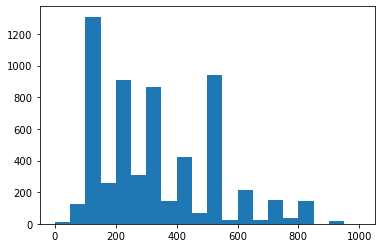

In [37]:
#histogram plot of Fees
plt.figure()
plt.hist(x=ds_train['Fees'],bins=20,range=(0,1000))
plt.show()

Majority of doctors are charging a fee of 100.

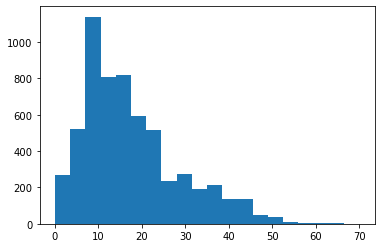

In [38]:
#histogram plot of Experience
plt.figure()
plt.hist(x=ds_train['Experience'],bins=20,range=(0,70))
plt.show()

Majority of the doctors are having an experience of 9 years.

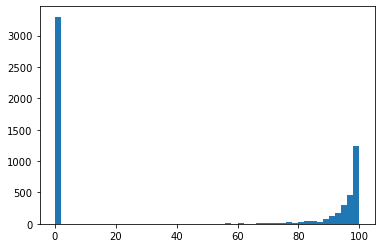

In [39]:
#histogram plot of rating
plt.figure()
plt.hist(x=ds_train['Rating'],bins=50,range=(0,100))
plt.show()

Majority of the ratings were missing and were imputed as 0. The highest ratings given by actual people is for 100%.

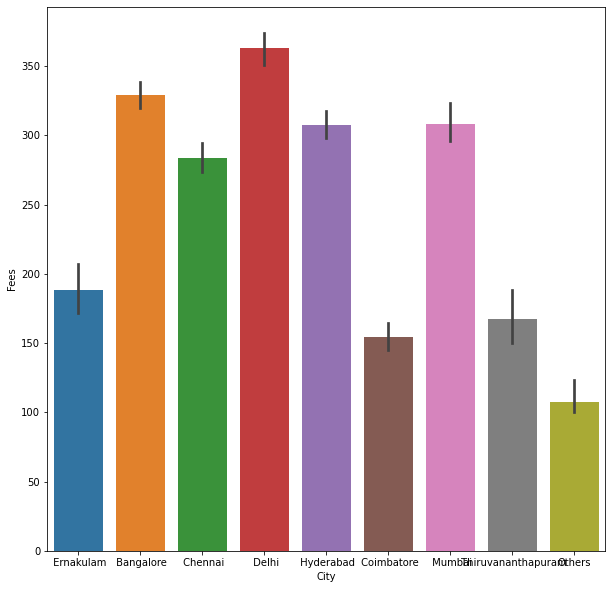

City
 Bangalore             328.842607
 Chennai               283.602339
 Coimbatore            154.298246
 Delhi                 362.911392
 Ernakulam             188.431373
 Hyderabad             307.507886
 Mumbai                308.292863
 Thiruvananthapuram    167.267442
Others                 107.692308
Name: Fees, dtype: float64


In [40]:
#lets find the mean fees charged across various cities
plt.figure(figsize=(10,10))
sns.barplot(x='City',y='Fees',data=ds_train)
plt.show()
print(ds_train.groupby('City')['Fees'].mean())

Among the 8 cities Delhi has the highest mean fees charged by the doctors in that place and Others have the lowest mean.

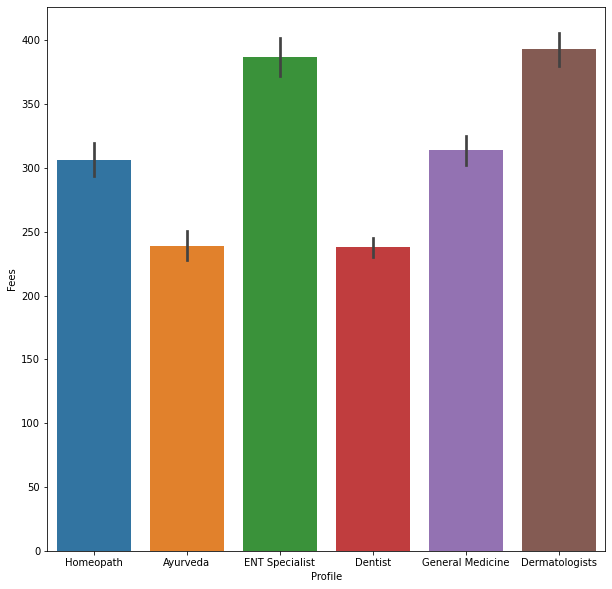

Profile
Ayurveda            238.968193
Dentist             238.199714
Dermatologists      393.133462
ENT Specialist      387.321429
General Medicine    313.908781
Homeopath           306.499407
Name: Fees, dtype: float64


In [41]:
#lets find the mean fees charged by doctors of various profiles
plt.figure(figsize=(10,10))
sns.barplot(x='Profile',y='Fees',data=ds_train)
plt.show()
print(ds_train.groupby('Profile')['Fees'].mean())

Among the various profiles Dermatologists have the highest mean fees charged and Dentists have the lower mean fees charged.
There is not much difference between the Dentists and the Ayurveda Doctors in terms of mean fees charged. 

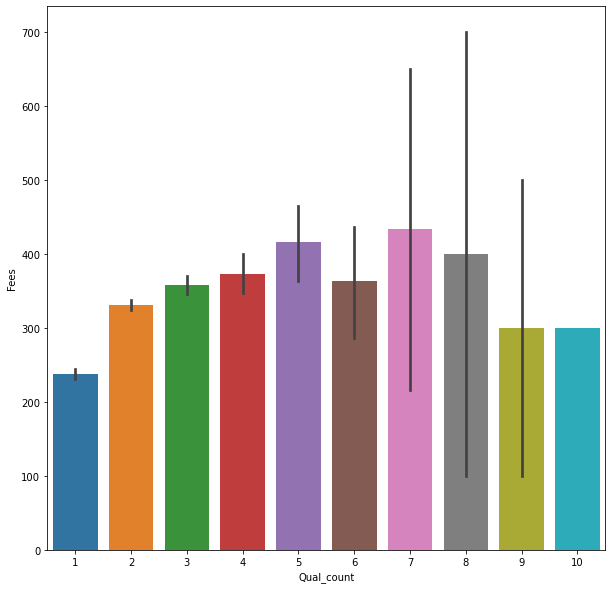

Qual_count
1     237.524465
2     330.705860
3     358.412060
4     373.540856
5     416.309524
6     363.043478
7     433.333333
8     400.000000
9     300.000000
10    300.000000
Name: Fees, dtype: float64


In [42]:
#mean fees of doctors possessing number of qualifications.
plt.figure(figsize=(10,10))
sns.barplot(x='Qual_count',y='Fees',data=ds_train)
plt.show()
print(ds_train.groupby('Qual_count')['Fees'].mean())

Doctors with 7 qualifications have the highest mean fees. 

In [43]:
#Converting datatypes
#Rating
ds_train['Rating']=ds_train['Rating'].astype('float')
ds_test['Rating']=ds_test['Rating'].astype('float')
#Experience
ds_train['Experience']=ds_train['Experience'].astype('float')
ds_test['Experience']=ds_test['Experience'].astype('float')


In [44]:
ds_train.dtypes

Experience    float64
Rating        float64
Place          object
Profile        object
Fees            int64
City           object
Qual_1         object
Qual_2         object
Qual_3         object
Qual_4         object
Qual_5         object
Qual_6         object
Qual_7         object
Qual_8         object
Qual_9         object
Qual_10        object
Qual_count      int64
dtype: object

In [45]:
ds_test.dtypes

Experience    float64
Rating        float64
Place          object
Profile        object
City           object
Qual_1         object
Qual_2         object
Qual_3         object
Qual_4         object
Qual_5         object
Qual_6         object
Qual_7         object
Qual_8         object
Qual_9         object
Qual_10        object
Qual_11        object
Qual_12        object
Qual_13        object
Qual_14        object
Qual_15        object
Qual_16        object
Qual_17        object
Qual_count      int64
dtype: object

In [46]:
#let us drop the unwanted columns from both the training and testing dataset.
ds_train.drop(columns=['Place','Qual_1','Qual_2','Qual_3','Qual_4','Qual_5','Qual_6','Qual_7','Qual_8','Qual_9','Qual_10'],axis=1,inplace=True)         #training dataset
ds_test.drop(columns=['Place','Qual_1','Qual_2','Qual_3','Qual_4','Qual_5','Qual_6','Qual_7','Qual_8','Qual_9','Qual_10','Qual_11','Qual_12','Qual_13','Qual_14','Qual_15','Qual_16','Qual_17'],axis=1,inplace=True)                    #testing dataset

Place may have any values which cannot be used for training the model also the various qualifications are also not relevant in the fee prediction process. So we had dropped the unwanted columns 

In [47]:
ds_train.head()

,Experience,Rating,Profile,Fees,City,Qual_count
0,24.0,100.0,Homeopath,100,Ernakulam,2
1,12.0,98.0,Ayurveda,350,Bangalore,2
2,9.0,0.0,ENT Specialist,300,Bangalore,2
3,12.0,0.0,Ayurveda,250,Bangalore,2
4,20.0,100.0,Ayurveda,250,Chennai,1


In [48]:
ds_test.head()

,Experience,Rating,Profile,City,Qual_count
0,35.0,0.0,General Medicine,Mumbai,1
1,31.0,0.0,ENT Specialist,Hyderabad,2
2,40.0,70.0,Dermatologists,Chennai,2
3,0.0,0.0,Ayurveda,Delhi,1
4,16.0,100.0,Dentist,Bangalore,2


In [49]:
#we have to label encode the profile and city columns in the dataset
list=['Profile','City']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list:
    ds_train[i]=le.fit_transform(ds_train[i])
    ds_test[i]=le.transform(ds_test[i])

In [50]:
ds_train.head()

,Experience,Rating,Profile,Fees,City,Qual_count
0,24.0,100.0,5,100,4,2
1,12.0,98.0,0,350,0,2
2,9.0,0.0,3,300,0,2
3,12.0,0.0,0,250,0,2
4,20.0,100.0,0,250,1,1


In [51]:
ds_test.head()

,Experience,Rating,Profile,City,Qual_count
0,35.0,0.0,4,6,1
1,31.0,0.0,3,5,2
2,40.0,70.0,2,1,2
3,0.0,0.0,0,3,1
4,16.0,100.0,1,0,2


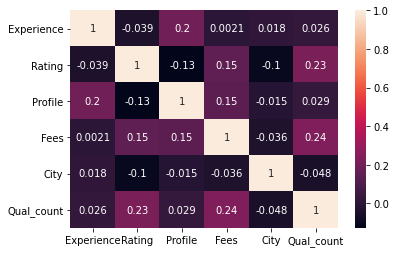

In [52]:
#lets check the cotrelation
sns.heatmap(ds_train.corr(),annot=True)

### Inference
1. Qualification Count has the highest correlation than other attributes.
2. City has the highest negative correlation among other attributes.

In [53]:
#summary satistics of train dataset
ds_train.describe()

,Experience,Rating,Profile,Fees,City,Qual_count
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,2.441872,307.944640,3.079517,1.993625
std,11.142798,47.340934,1.658014,190.920373,2.313018,0.964274
min,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000
25%,9.000000,0.000000,1.000000,150.000000,1.000000,1.000000
50%,14.000000,0.000000,2.000000,300.000000,3.000000,2.000000
75%,23.000000,96.000000,4.000000,500.000000,5.000000,2.000000
max,66.000000,100.000000,5.000000,950.000000,8.000000,10.000000


In [54]:
#summary statistics of test dataset
ds_test.describe()

,Experience,Rating,Profile,City,Qual_count
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,17.874685,42.634122,2.508807,3.037745,2.031203
std,11.366764,47.284014,1.654223,2.277143,0.991420
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,0.000000,1.000000,1.000000,1.000000
50%,15.000000,0.000000,2.000000,3.000000,2.000000
75%,24.000000,96.000000,4.000000,5.000000,2.000000
max,65.000000,100.000000,5.000000,8.000000,17.000000


There is not much difference between the 75 th percentile and max value.Also we cannot treat outliers because they may be some of the valid datapoints which get removed while treating outliers.  

### Model Training

In [55]:
#we split the data into target and input variables
ds_x=ds_train.drop(columns='Fees',axis=1)
y=ds_train['Fees']

In [56]:
#input data
ds_x.head()

,Experience,Rating,Profile,City,Qual_count
0,24.0,100.0,5,4,2
1,12.0,98.0,0,0,2
2,9.0,0.0,3,0,2
3,12.0,0.0,0,0,2
4,20.0,100.0,0,1,1


In [57]:
#target variable
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [58]:
# Using standard scaler we standardise the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [59]:
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=57)
print(x_train.shape,'\t',x_test.shape)
print('\n')
print(y_train.shape,'\t',y_test.shape)

(3874, 5) 	 (2087, 5)


(3874,) 	 (2087,)


In [60]:
#importing libraries for models and error metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
 
#importing cross validation and grid search cv
from sklearn.model_selection import GridSearchCV,cross_val_score


In [61]:
#creating a for loop for all the models
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('r2 score:',r2_score(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  LinearRegression() is: 0.08878953847189353
Metrics:
mean absolute error: 147.83768698165312
mean squared error: 33422.886943171216
r2 score: 0.09379228740039713
END OF THE MODEL----------------------------------- 


score of  Lasso() is: 0.08865344058207159
Metrics:
mean absolute error: 148.06405241461843
mean squared error: 33439.4856708851
r2 score: 0.09334223965020594
END OF THE MODEL----------------------------------- 


score of  Ridge() is: 0.0887895333787464
Metrics:
mean absolute error: 147.83930749995747
mean squared error: 33422.97466507422
r2 score: 0.09378990896237616
END OF THE MODEL----------------------------------- 


score of  ElasticNet() is: 0.0794810529808484
Metrics:
mean absolute error: 150.23972278043786
mean squared error: 33864.06295460111
r2 score: 0.08183051088326143
END OF THE MODEL----------------------------------- 


score of  SVR() is: 0.06174225503239217
Metrics:
mean absolute error: 146.43087880588448
mean squared error: 34829.40359717497
r2 

In [62]:
#lets check the cross validation scores
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation:',score.std())
    print('#########################################################')
    print('\n')

Model: LinearRegression()
Score: [0.08847606 0.08724941 0.11340604 0.09291086 0.08282812 0.10064385
 0.06318398 0.06770847 0.10063842 0.08402037]
Mean Score: 0.08810655762124066
Standard Deviation: 0.014352781415236115
#########################################################


Model: Lasso()
Score: [0.08788445 0.08651031 0.11254055 0.0933533  0.08318889 0.0995208
 0.06463448 0.06883753 0.09959703 0.08421363]
Mean Score: 0.08802809631619767
Standard Deviation: 0.013605043493888795
#########################################################


Model: Ridge()
Score: [0.08847626 0.08725049 0.113403   0.09290987 0.0828269  0.10063942
 0.06319011 0.06771354 0.10063557 0.08402394]
Mean Score: 0.08810690884522182
Standard Deviation: 0.014349728051882421
#########################################################


Model: ElasticNet()
Score: [0.07897265 0.07907581 0.09740622 0.08162506 0.072727   0.08436985
 0.06378189 0.06684697 0.08595591 0.07868789]
Mean Score: 0.07894492330942197
Standard Devia

Of all the above models Gradient Boosting Regressor shows the highest r2 score. 

In [63]:
#using grid search cv
gbr=GradientBoostingRegressor(random_state=57)
parameters = {"criterion": ["friedman_mse",  "mae"],
              "max_features":["log2","sqrt"]}
grid = GridSearchCV(estimator=gbr, param_grid=parameters,cv=10,scoring='r2') 
grid.fit(x,y)
grid.best_params_
  

{'criterion': 'friedman_mse', 'max_features': 'log2'}

In [64]:
gbr=GradientBoostingRegressor(random_state=57,criterion='friedman_mse',max_features='log2')
parameters = {'learning_rate': [0.01,0.1,1],
              'n_estimators': [10,100,1000]}
grid = GridSearchCV(estimator=gbr, param_grid=parameters,cv=10,scoring='r2') 
grid.fit(x,y)
grid.best_params_
  

{'learning_rate': 0.01, 'n_estimators': 1000}

In [65]:
#training the Gradient Boosting Regressor model with best parameters
gbr=GradientBoostingRegressor(random_state=57,criterion='friedman_mse',max_features='log2',learning_rate= 0.01,n_estimators=1000)
gbr.fit(x_train,y_train)
print('score:',gbr.score(x_train,y_train))
predgbr=gbr.predict(x_test)
print('\n')
print('mean absolute error:',mean_absolute_error(y_test,predgbr))
print('mean squared error:',mean_squared_error(y_test,predgbr))
print('r2 score:',r2_score(y_test,predgbr))

score: 0.23918463661097256


mean absolute error: 134.3254443218765
mean squared error: 29020.698492490268
r2 score: 0.2131505323391707


After parameter tuning r2 score has been improved from 0.211 to 0.213.

### Test data

In [66]:
ds_x=ds_test
ds_x

,Experience,Rating,Profile,City,Qual_count
0,35.0,0.0,4,6,1
1,31.0,0.0,3,5,2
2,40.0,70.0,2,1,2
3,0.0,0.0,0,3,1
4,16.0,100.0,1,0,2
...,...,...,...,...,...
1982,10.0,0.0,0,0,2
1983,4.0,0.0,2,1,3
1984,9.0,0.0,4,1,2
1985,12.0,98.0,1,0,1


In [67]:
#applying standard scaling
x=sc.transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [68]:
#predicting the output
Predictgbr=gbr.predict(x)

In [69]:
#predicted output
pd.DataFrame(Predictgbr)

,0
0,223.533960
1,368.442219
2,342.752692
3,227.408117
4,254.240028
...,...
1982,257.127774
1983,350.273298
1984,310.167685
1985,228.125194


## Saving the model and result

In [70]:
#saving the GBR model
import joblib
joblib.dump(gbr,'Doctor_fees.pkl')

['Doctor_fees.pkl']

In [71]:
#saving the output to csv file
pred_OP=pd.DataFrame(Predictgbr)
pred_OP.to_csv('Doctor_Fees_predictions.csv')